<a href="https://colab.research.google.com/github/jtlai0921/-/blob/master/%E3%80%8Ckeras_03NEU_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input, Conv2D, MaxPooling2D, Activation
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import cv2
from tqdm.auto import tqdm
from sklearn.model_selection import train_test_split

In [2]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
IMG_SIZE = 100
class_map = {
    'PS':0,
    'Sc':1,
    'RS':2,
    'In':3,
    'Cr':4,
    'Pa':5
}
num_classes = len(class_map)

In [9]:
paths = glob("/content/drive/MyDrive/緯育AI瑕疵檢測/Day2/NEU_defect/*.bmp") # get all .bmp image paths
paths = np.random.choice(paths, 10) # demo for 300 images
cls_list = [path.split('/')[-1].split('_')[0] for path in paths] # get all images' class label
print(paths[:3])
print(cls_list[:3])

['/content/drive/MyDrive/緯育AI瑕疵檢測/Day2/NEU_defect/Pa_241.bmp'
 '/content/drive/MyDrive/緯育AI瑕疵檢測/Day2/NEU_defect/Sc_175.bmp'
 '/content/drive/MyDrive/緯育AI瑕疵檢測/Day2/NEU_defect/RS_129.bmp']
['Pa', 'Sc', 'RS']


In [10]:
classes, counts = np.unique(cls_list, return_counts=True) # classes distribution
print(classes, counts)

['Cr' 'PS' 'Pa' 'RS' 'Sc'] [2 2 3 2 1]


<BarContainer object of 5 artists>

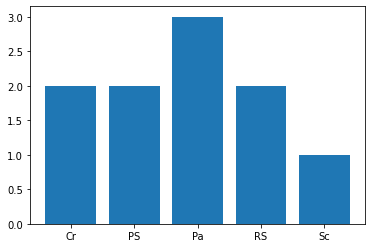

In [11]:
plt.bar(classes, height=counts)

(200, 200, 3)


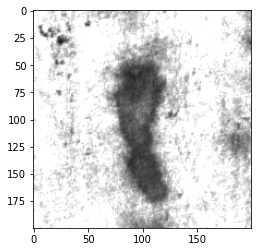

Pa (100, 100, 3)


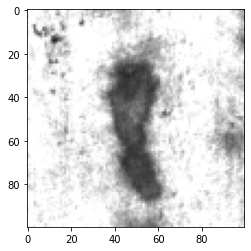

In [12]:
img = cv2.imread(paths[0]) # read image
print(img.shape)
plt.imshow(img) # show image
plt.show()

# resize image
img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
label = cls_list[0]

print(label, img.shape)
plt.imshow(img)
plt.show()

### Method 1: Read all images and labels

In [13]:
X = np.zeros((len(paths), IMG_SIZE, IMG_SIZE, 3))
y = np.zeros((len(paths), 1))
for i, path in enumerate(tqdm(paths)):  # tqdm: progress bar
    img = cv2.imread(path)[:,:,::-1]
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    label = path.split('/')[-1].split('_')[0]
    X[i] = img
    y[i] = class_map[label]

In [14]:
y[:5]

array([[5.],
       [1.],
       [2.],
       [5.],
       [0.]])

### Method 2: Read all images and labels from pickle file

In [17]:
import pickle
# load variable from pickle file
with open('/content/drive/MyDrive/緯育AI瑕疵檢測/Day2/NEU_defect/*.bmp', 'rb') as file:
    X = pickle.load(file)
with open('/content/drive/MyDrive/緯育AI瑕疵檢測/Day2/NEU_defect/*.bmp', 'rb') as file:
    y = pickle.load(file)
X.shape, y.shape

FileNotFoundError: ignored

### Data Preprovess

In [18]:
# normalization 0~1
X = X / 255.
# one-hot encoding
y = to_categorical(y, num_classes=len(class_map)) # or to_categorical(y, num_classes=6)
X.shape, y.shape

((10, 100, 100, 3), (10, 6))

In [19]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8, 100, 100, 3), (2, 100, 100, 3), (8, 6), (2, 6))

### Build Model

In [20]:
# 1
inputs = Input(shape=(IMG_SIZE, IMG_SIZE, 3))
x = Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = Conv2D(16, (3, 3), activation=keras.activations.relu)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation=keras.activations.relu)(x)
x = Conv2D(32, (3, 3), activation=keras.activations.relu)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(32, (3, 3), activation=keras.activations.relu)(x)
x = Conv2D(32, (3, 3), activation=keras.activations.relu)(x)
x = MaxPooling2D(pool_size=(2, 2))(x)

x = Flatten()(x)
x = Dense(128, activation='relu')(x)
prediction = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inputs, outputs=prediction)

In [21]:
# 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), activation=keras.activations.relu))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
activation (Activation)      (None, 96, 96, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 94, 94, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 70688)             0

In [23]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

### Training

In [24]:
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=50,
                    verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/50
1/1 [==============================] - 8s 8s/step - loss: 1.8322 - accuracy: 0.1250 - val_loss: 2.7518 - val_accuracy: 0.0000e+00
Epoch 2/50
1/1 [==============================] - 0s 46ms/step - loss: 1.5905 - accuracy: 0.2500 - val_loss: 2.4646 - val_accuracy: 0.0000e+00
Epoch 3/50
1/1 [==============================] - 0s 41ms/step - loss: 1.8142 - accuracy: 0.2500 - val_loss: 1.5145 - val_accuracy: 0.0000e+00
Epoch 4/50
1/1 [==============================] - 0s 41ms/step - loss: 1.4915 - accuracy: 0.5000 - val_loss: 1.6685 - val_accuracy: 0.0000e+00
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 1.4226 - accuracy: 0.5000 - val_loss: 1.9768 - val_accuracy: 0.0000e+00
Epoch 6/50
1/1 [==============================] - 0s 40ms/step - loss: 1.2818 - accuracy: 0.3750 - val_loss: 2.2542 - val_accuracy: 0.0000e+00
Epoch 7/50
1/1 [==============================] - 0s 40ms/step - loss: 1.1605 - accuracy: 0.6250 - val_loss: 2.2842 - val_accuracy: 0.0000e+00
E

In [25]:
score = model.evaluate(X_test, y_test, verbose=0)
print(f'test loss: {score[0]}, test acc: {score[1]}')
score

test loss: 3.9130561351776123, test acc: 0.0


[3.9130561351776123, 0.0]

In [26]:
logs = history.history
logs

{'accuracy': [0.125,
  0.25,
  0.25,
  0.5,
  0.5,
  0.375,
  0.625,
  0.625,
  0.625,
  0.5,
  1.0,
  0.875,
  0.875,
  0.875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.875,
  1.0,
  0.5,
  1.0,
  0.75,
  0.875,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0],
 'loss': [1.832249641418457,
  1.5904685258865356,
  1.8142151832580566,
  1.4914528131484985,
  1.4226255416870117,
  1.2818127870559692,
  1.1604728698730469,
  1.0180983543395996,
  0.9211297631263733,
  0.98735511302948,
  0.7104489803314209,
  0.7788001894950867,
  0.4305296540260315,
  0.32678091526031494,
  0.2825453281402588,
  0.2605569362640381,
  0.15565994381904602,
  0.12021197378635406,
  0.04188333824276924,
  0.12828075885772705,
  0.02099880576133728,
  0.22450044751167297,
  0.040452033281326294,
  1.455101728439331,
  0.007522442378103733,
  1.1783636808395386,
  0.19115053117275238,
  0.

Text(0.5, 1.0, 'accuracy')

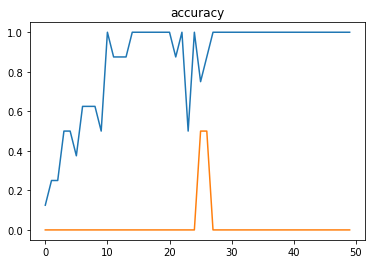

In [27]:
plt.plot(logs['accuracy'])
plt.plot(logs['val_accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

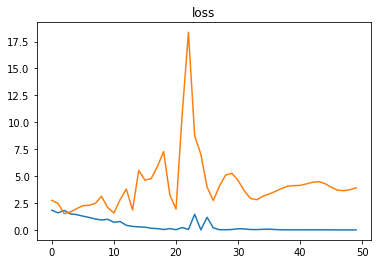

In [28]:
plt.plot(logs['loss'])
plt.plot(logs['val_loss'])
plt.title('loss')

In [30]:
prediction = model.predict(X_test[2:3]) # batch
print(prediction)
print(np.argmax(prediction))


ValueError: ignored

In [31]:
# confusion matrix
preds = model.predict(X_test)
preds = np.argmax(preds, axis=-1)
preds.shape

(2,)

In [32]:
from sklearn.metrics import confusion_matrix, classification_report
y_true = np.argmax(y_test, axis=-1)
print(confusion_matrix(y_true, preds))
print(classification_report(y_true, preds))
# row: y_true, col: y_pred

[[0 0 0]
 [1 0 0]
 [1 0 0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       1.0
           5       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
#TODO : 3->1

In [34]:
model.save('/content/drive/My Drive/my_model.h5')
del model
model2 = load_model('/content/drive/My Drive/my_model.h5')

In [35]:
# save and load weights
model2.save_weights('/content/drive/My Drive/my_model_weights.h5')

model2.load_weights('/content/drive/My Drive/my_model_weights.h5')